In [1]:
# basic imports
import sys
import os
import os.path as op
import datetime

# dev library
sys.path.insert(0, op.join(os.path.abspath('')))

# Forecast module
from forecast_CAN import Forecast_CAN

Pulling the data from: 

https://nomads.ncep.noaa.gov/dods/wave/mww3/20200903/multi_1.glo_30mext20200903_00z


The times with forecast go from 2020-09-04 00:00:00 to 2020-09-11 12:00:00 

Generating images and GIF in "path"... 


 


 Number of images to plot from the total? 
TOTAL: 61, To plot: 
1
Plotting time: 2020-09-04 00:00:00...

 GIF generated and saved!! 



<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    title: Multi-grid wave model: Global 30 arc-min grid from 00Z03sep2020 downloaded Sep 03 04:12 UTC
    Conventions: COARDS
GrADS
    dataType: Grid
    history: Thu Sep 03 04:17:09 GMT 2020 : imported by GrADS Data Server 2.0
    dimensions(sizes): lat(336), lon(720), time(61)
    variables(dimensions): float64 time(time), float64 lat(lat), float64 lon(lon), float32 dirpwsfc(time,lat,lon), float32 htsgwsfc(time,lat,lon), float32 perpwsfc(time,lat,lon), float32 swdir_1(time,lat,lon), float32 swdir_2(time,lat,lon), float32 swell

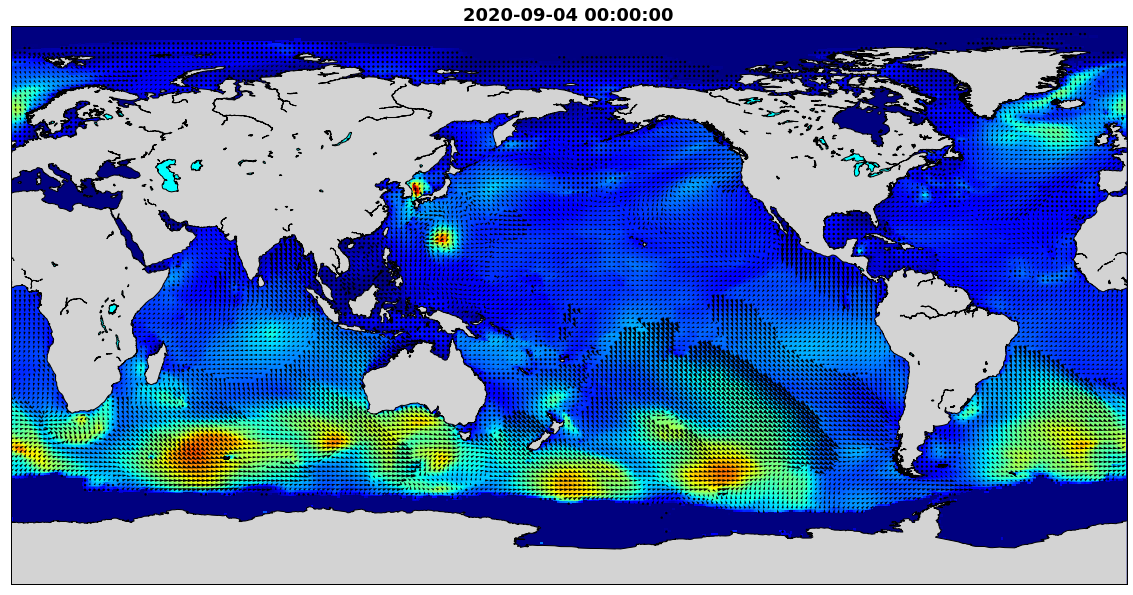

In [2]:
date         = datetime.date.today() # today or ex: '20200707'
date         = date.strftime("%Y%m%d")
images_path  = op.join(os.getcwd(), '..', 'images', 'forecast') # save images and GIF
location     = (44.0, -3.8) # location to see the forecast
delta_lon    = 1
delta_lat    = 0.2

forecast = Forecast_CAN(date=date, 
                        images_path=images_path, 
                        location=location,
                        delta_lon=delta_lon,
                        delta_lat=delta_lat)

print(forecast.forecast)

In [3]:
forecast_data = forecast.select_region(zoom=8)

Location in (44.0, -3.8)!! 

These are the coordinates in the selected region: 

[44.]
[355.5 356.  356.5 357. ]




Map(center=[44.0, 356.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…


 If selected coordinates are not desired, 
please rerun the notebook with the desired parameters!! 

Saving the data in the shown region... 

<xarray.Dataset>
Dimensions:    (lat: 1, lon: 4, time: 61)
Coordinates:
  * time       (time) datetime64[ns] 2020-09-04 ... 2020-09-11T12:00:00
  * lat        (lat) float64 44.0
  * lon        (lon) float64 355.5 356.0 356.5 357.0
Data variables:
    Hsea       (time, lat, lon) float32 0.51 0.45999998 ... 9.999e+20 9.999e+20
    Tpsea      (time, lat, lon) float32 3.1 2.9299998 ... 9.999e+20 9.999e+20
    Dirsea     (time, lat, lon) float32 76.84 70.74 ... 9.999e+20 9.999e+20
    Hswell1    (time, lat, lon) float32 0.9 0.9 0.89 ... 1.09 0.97999996
    Tpswell1   (time, lat, lon) float32 10.0199995 10.04 ... 14.45 14.509999
    Dirswell1  (time, lat, lon) float32 288.50998 288.72998 ... 320.6 319.6
    Hswell2    (time, lat, lon) float32 0.56 0.51 0.45999998 ... 0.78 0.79999995
    Tpswell2   (time, lat, lon) float32 12.509999 12.59 12.66 ... 9.0

In [4]:
p_data_swan = op.join(os.getcwd(), '..', 'data', 'projects-swan')

# -------------- EDIT THIS PART --------------------------------------------- #
info = {
    'name'       : ['SVI', 'SDR', 'BRS', 'BIO'], # used name in the SWAN section
    'resolution' : [str(0.0024), str(0.0024), str(0.0024), str(0.0024)], # used resolution in the SWAN section
    'num_cases'  : [str(300), str(300), str(300), str(300)] # num cases run in SWAN
}     
# --------------------------------------------------------------------------- #

# Example coordinates for the forecast reconstruction:
# Sardinero 43.5, -3.75
# Liencres 43.46, -3.97
# Jeffrey's Bay -34.0 24.98

forecast_dataset = forecast.forecast_reconstruction(p_data_swan=p_data_swan,
                                                    info=info,
                                                    forecast_data=forecast_data)


 Select the number of points to reconstruct in GRID 1 : 
0

 Select the number of points to reconstruct in GRID 2 : 
1
Select the desired point to reconstruct in GRID 2 as it is given in Google Maps: 

Latitude location to obtain the forecast reconstruction: 43.46
Longitude location to obtain the forecast reconstruction: 
-3.97


Forecast in the selected region will be calculated!! 

Performing RFB reconstruction... 

ix_scalar: 0,  optimization: 5.27 | interpolation: 0.00
ix_scalar: 1,  optimization: 5.02 | interpolation: 0.00
ix_scalar: 2,  optimization: 4.56 | interpolation: 0.00
ix_scalar: 4,  optimization: 6.43 | interpolation: 0.00
ix_directional: 3,  optimization: 9.47 | interpolation: 0.01
ix_scalar: 0,  optimization: 4.13 | interpolation: 0.00
ix_scalar: 1,  optimization: 6.00 | interpolation: 0.00
ix_scalar: 2,  optimization: 11.49 | interpolation: 0.00
ix_scalar: 4,  optimization: 7.37 | interpolation: 0.00
ix_directional: 3,  optimization: 10.33 | interpolation: 0.01
ix_sc

AttributeError: 'Series' object has no attribute 'reshape'

In [ ]:
forecast.plot_results(forecast_dataset=forecast_dataset)